<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Sist_de_recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://grouplens.org/datasets/movielens/

Este Exemplo: https://grouplens.org/datasets/movielens/10m/

In [ ]:
!pip install gitly==1.1.4

# Importação, instanciação e instalação
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('git')

In [2]:
import pandas as pd

In [3]:
df_filmes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/Intro à CD/Datasets/10M(250MB)/movies.dat', sep='::',
                        names=['id_filmes','nomes','categorias'])
df_filmes.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,id_filmes,nomes,categorias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
df_rate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/Intro à CD/Datasets/10M(250MB)/ratings.dat', sep='::',
                        names=['id_usuario','id_filmes','nota','timestamp'])
df_rate.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,id_usuario,id_filmes,nota,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392


# Estruturas

In [5]:
df_filmes.shape

(10681, 3)

In [6]:
df_rate.shape

(9999762, 4)

In [7]:
df_rate.id_filmes.value_counts().head(5)

296    34863
356    34457
593    33667
480    32629
318    31124
Name: id_filmes, dtype: int64

In [8]:
df_rate.id_usuario.value_counts().rename('qtd_avaliadas').head(3)

59269    7359
67385    7047
14463    5169
Name: qtd_avaliadas, dtype: int64

# Sumarização

In [9]:
df_rate.id_usuario.nunique()

69875

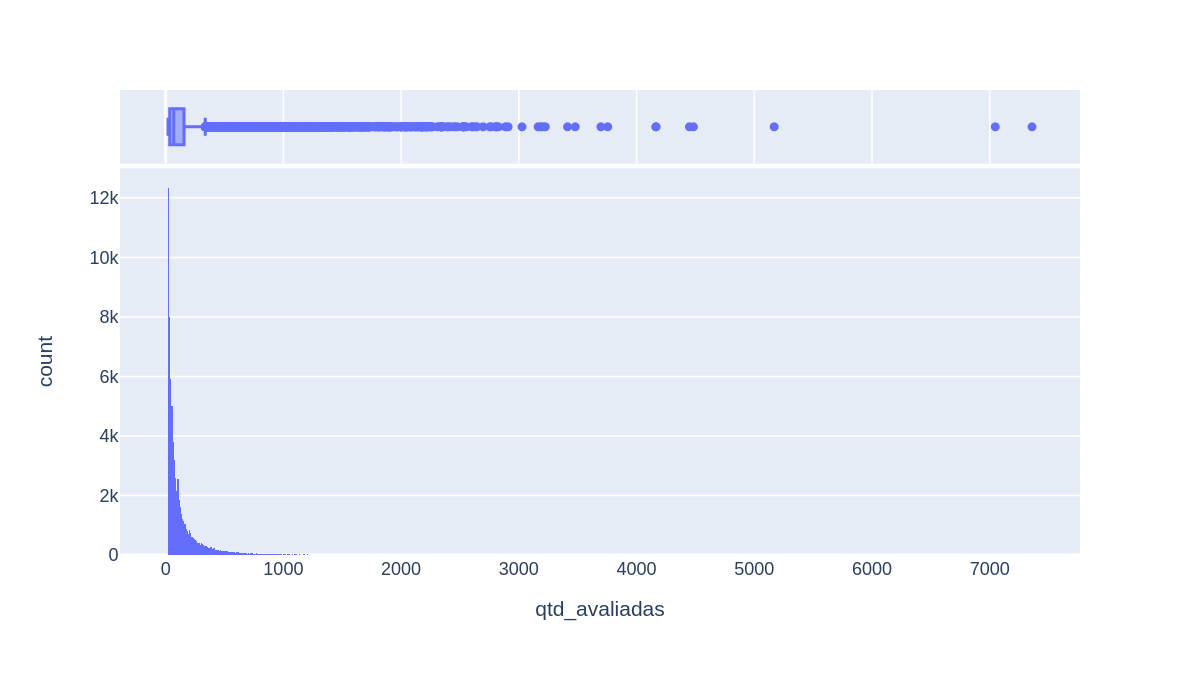

In [10]:
import plotly.express as px

df = df_rate.id_usuario.value_counts().rename('qtd_avaliadas')
fig = px.histogram(df, x='qtd_avaliadas', marginal="box")
gitly.show(fig, scale=1.5)

# S R - Início

In [11]:
df_rate.head()

,id_usuario,id_filmes,nota,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [12]:
# info 1 - somatoria da nota: Boa? (Não)
df_rate.groupby('id_usuario').sum()['nota'].head(8)

id_usuario
1     110.0
2      64.0
3     130.0
4     153.0
5     335.0
6     165.0
7     428.0
8    2718.5
Name: nota, dtype: float64

In [13]:
# info 2 - média da nota: Boa? (Sim)
df_rate.groupby('id_usuario').mean()['nota'].head(8)

id_usuario
1    5.000000
2    3.200000
3    3.939394
4    4.026316
5    3.850575
6    3.928571
7    3.926606
8    3.398125
Name: nota, dtype: float64

In [14]:
df_filmes.head()

,id_filmes,nomes,categorias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
df_cat_exp = df_filmes.categorias.str.split('|', expand=True)
df_cat_exp.head(3)

,0,1,2,3,4,5,6,7
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None


In [16]:
lista_genero = list(df_cat_exp[0].unique())
lista_genero.remove('IMAX')
lista_genero.remove('(no genres listed)')
print(lista_genero)

['Adventure', 'Comedy', 'Action', 'Animation', 'Drama', 'Crime', 'Sci-Fi', 'Children', 'Documentary', 'Mystery', 'Thriller', 'Horror', 'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Musical']


In [17]:
voc_dict = {}

i=0
for gen in lista_genero:
    voc_dict[ gen.lower() ] = i
    i = i + 1
    
voc_dict

{'action': 2,
 'adventure': 0,
 'animation': 3,
 'children': 7,
 'comedy': 1,
 'crime': 5,
 'documentary': 8,
 'drama': 4,
 'fantasy': 12,
 'film-noir': 14,
 'horror': 11,
 'musical': 17,
 'mystery': 9,
 'romance': 15,
 'sci-fi': 6,
 'thriller': 10,
 'war': 16,
 'western': 13}

Usar o CountVectorizer para vetorizar o campo categoria do dataframe de filmes

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Tutorial: https://kavita-ganesan.com/how-to-use-countvectorizer/#Example-of-How-CountVectorizer-Works

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer(analyzer='word', vocabulary= voc_dict, ngram_range=(1,2), token_pattern = '[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+')
# Treinando o vetorizador
vetorizador.fit(lista_genero)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='[a-zA-Z0-9$&+,:;=?@#<>.^*()%!-]+',
                tokenizer=None,
                vocabulary={'action': 2, 'adventure': 0, 'animation': 3,
                            'children': 7, 'comedy': 1, 'crime': 5,
                            'documentary': 8, 'drama': 4, 'fantasy': 12,
                            'film-noir': 14, 'horror': 11, 'musical': 17,
                            'mystery': 9, 'romance': 15, 'sci-fi': 6,
                            'thriller': 10, 'war': 16, 'western': 13})

In [19]:
# Testando o vetorizador
matriz_cat_exemplo = vetorizador.transform(['Action|Crime|Thriller'])
matriz_cat_exemplo.todense()

matrix([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [20]:
matriz_cat = vetorizador.transform(df_filmes.categorias)
matriz_cat.todense()[:5,:]

matrix([[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [21]:
df_filmes_cat_exp = pd.DataFrame(data=matriz_cat.todense(), columns=vetorizador.get_feature_names())
df_filmes_cat_exp.head()

,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_filmes_cat = pd.merge(df_filmes, df_filmes_cat_exp, how='left', left_index=True, right_index=True)
df_filmes_cat.head()

,id_filmes,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df_cat_exp = pd.merge(df_rate, df_filmes_cat, how='left', on='id_filmes')
df_cat_exp.head(5)

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,231,5.0,838983392,Dumb & Dumber (1994),Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Modelagem

### Alternativa 1: Somatório (NÃO usaremos)

In [24]:
df_cat_exp.groupby(by='id_usuario').sum().head()

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,9057,110.0,18457649035,6,11,10,4,6,2,5,7,0,0,5,0,2,0,0,5,2,3
2,15711,64.0,17364906892,10,4,14,0,7,1,6,1,0,1,7,1,1,1,0,4,3,1
3,179578,130.0,37626818010,6,11,7,2,20,3,0,2,0,4,6,0,3,3,1,12,6,1
4,13501,153.0,32087840561,13,19,17,3,14,5,8,5,0,0,11,1,5,3,0,8,3,3
5,56883,335.0,74638384961,8,29,5,1,64,11,8,4,0,4,14,6,4,0,1,26,6,4


### Alternativa 2: Média (NÃO usaremos)

In [25]:
df_mean = df_cat_exp.groupby(by='id_usuario').mean()
df_mean.head(5)

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,411.681818,5.000000,8.389840e+08,0.272727,0.500000,0.454545,0.181818,0.272727,0.090909,0.227273,0.318182,0.0,0.000000,0.227273,0.000000,0.090909,0.000000,0.000000,0.227273,0.090909,0.136364
2,785.550000,3.200000,8.682453e+08,0.500000,0.200000,0.700000,0.000000,0.350000,0.050000,0.300000,0.050000,0.0,0.050000,0.350000,0.050000,0.050000,0.050000,0.000000,0.200000,0.150000,0.050000
3,5441.757576,3.939394,1.140207e+09,0.181818,0.333333,0.212121,0.060606,0.606061,0.090909,0.000000,0.060606,0.0,0.121212,0.181818,0.000000,0.090909,0.090909,0.030303,0.363636,0.181818,0.030303
4,355.289474,4.026316,8.444169e+08,0.342105,0.500000,0.447368,0.078947,0.368421,0.131579,0.210526,0.131579,0.0,0.000000,0.289474,0.026316,0.131579,0.078947,0.000000,0.210526,0.078947,0.078947
5,653.827586,3.850575,8.579125e+08,0.091954,0.333333,0.057471,0.011494,0.735632,0.126437,0.091954,0.045977,0.0,0.045977,0.160920,0.068966,0.045977,0.000000,0.011494,0.298851,0.068966,0.045977


### Alternativa 3: (Avaliação * Categorias).mean 

In [26]:
df_cat_exp.head(2)

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# Multiplicação das categorias pela nota
df_cat_exp.iloc[:,6:] = df_cat_exp.iloc[:,6:].multiply(df_cat_exp.nota, axis = 'index')
df_cat_exp.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,231,5.0,838983392,Dumb & Dumber (1994),Comedy,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,292,5.0,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,316,5.0,838983392,Stargate (1994),Action|Adventure|Sci-Fi,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Agrupando pela média
df_mean = df_cat_exp.groupby(by='id_usuario').mean()
df_mean.head()

,id_filmes,nota,timestamp,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,,
1,411.681818,5.000000,8.389840e+08,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.000000,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,785.550000,3.200000,8.682453e+08,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.150000,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,5441.757576,3.939394,1.140207e+09,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.000000,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909
4,355.289474,4.026316,8.444169e+08,1.447368,1.842105,1.763158,0.394737,1.684211,0.552632,0.894737,0.657895,0.0,0.000000,1.131579,0.078947,0.605263,0.342105,0.000000,0.789474,0.394737,0.394737
5,653.827586,3.850575,8.579125e+08,0.275862,1.195402,0.103448,0.011494,2.942529,0.540230,0.310345,0.149425,0.0,0.195402,0.643678,0.298851,0.172414,0.000000,0.057471,1.126437,0.275862,0.172414


In [29]:
df_features = df_mean.drop(labels=['id_filmes', 'timestamp'], axis='columns')
df_features.head(3)

,nota,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,
1,5.000000,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.00,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,3.200000,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.15,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,3.939394,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.00,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909


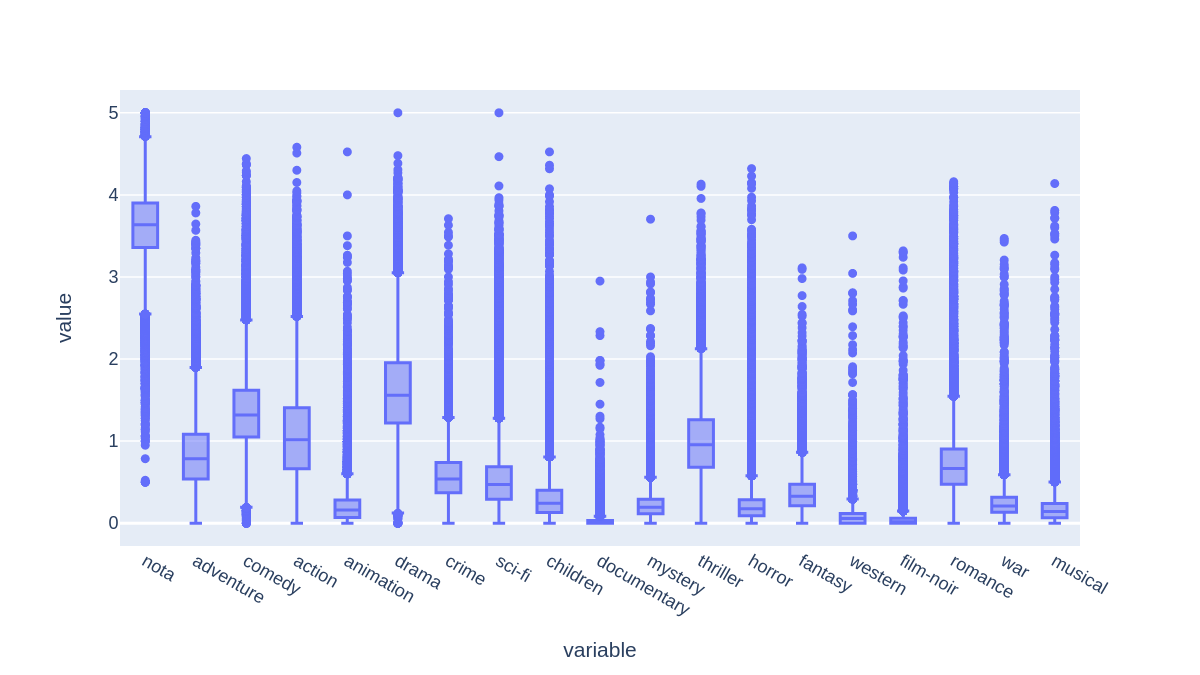

In [30]:
fig = px.box(df_features)
gitly.show(fig, scale = 1.5)

# Clusterização (Kmeans)

In [31]:
from sklearn.cluster import KMeans

n_kmax = 10
lista_inercia = []

for i in range(1,n_kmax):
  km = KMeans(n_clusters = i, init = 'random', n_init = 3, max_iter = 150, random_state = 0)
  km.fit(df_features)
  lista_inercia.append(km.inertia_)

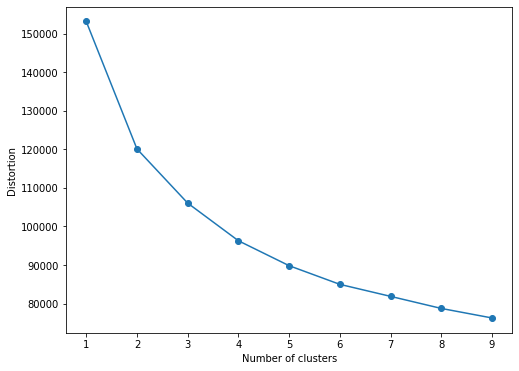

In [32]:
import matplotlib.pyplot as plt

# plot
plt.figure( figsize=(8,6) )
plt.plot(range(1, n_kmax), lista_inercia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Kmeans k = 4

In [33]:
k = 4
km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 150, random_state = 0)
km.fit(df_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=150, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

### Clusterizando cada usuário

In [34]:
y_cluster = km.predict(df_features)
y_cluster

array([1, 2, 0, ..., 0, 2, 3], dtype=int32)

In [35]:
df_cluster = pd.Series(data=y_cluster, name='grupo', index=df_features.index)
df_cluster.head()

id_usuario
1    1
2    2
3    0
4    2
5    0
Name: grupo, dtype: int32

In [36]:
df_grupos = pd.merge(df_cluster, df_features, how='left', left_index=True, right_index=True)
df_grupos.head()

,grupo,nota,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
id_usuario,,,,,,,,,,,,,,,,,,,,
1,1,5.000000,1.363636,2.500000,2.272727,0.909091,1.363636,0.454545,1.136364,1.590909,0.0,0.000000,1.136364,0.000000,0.454545,0.000000,0.000000,1.136364,0.454545,0.681818
2,2,3.200000,1.700000,0.600000,2.300000,0.000000,1.150000,0.100000,1.050000,0.150000,0.0,0.100000,1.000000,0.150000,0.150000,0.250000,0.000000,0.550000,0.550000,0.150000
3,0,3.939394,0.666667,1.212121,0.818182,0.242424,2.530303,0.363636,0.000000,0.242424,0.0,0.545455,0.742424,0.000000,0.378788,0.333333,0.121212,1.530303,0.742424,0.090909
4,2,4.026316,1.447368,1.842105,1.763158,0.394737,1.684211,0.552632,0.894737,0.657895,0.0,0.000000,1.131579,0.078947,0.605263,0.342105,0.000000,0.789474,0.394737,0.394737
5,0,3.850575,0.275862,1.195402,0.103448,0.011494,2.942529,0.540230,0.310345,0.149425,0.0,0.195402,0.643678,0.298851,0.172414,0.000000,0.057471,1.126437,0.275862,0.172414


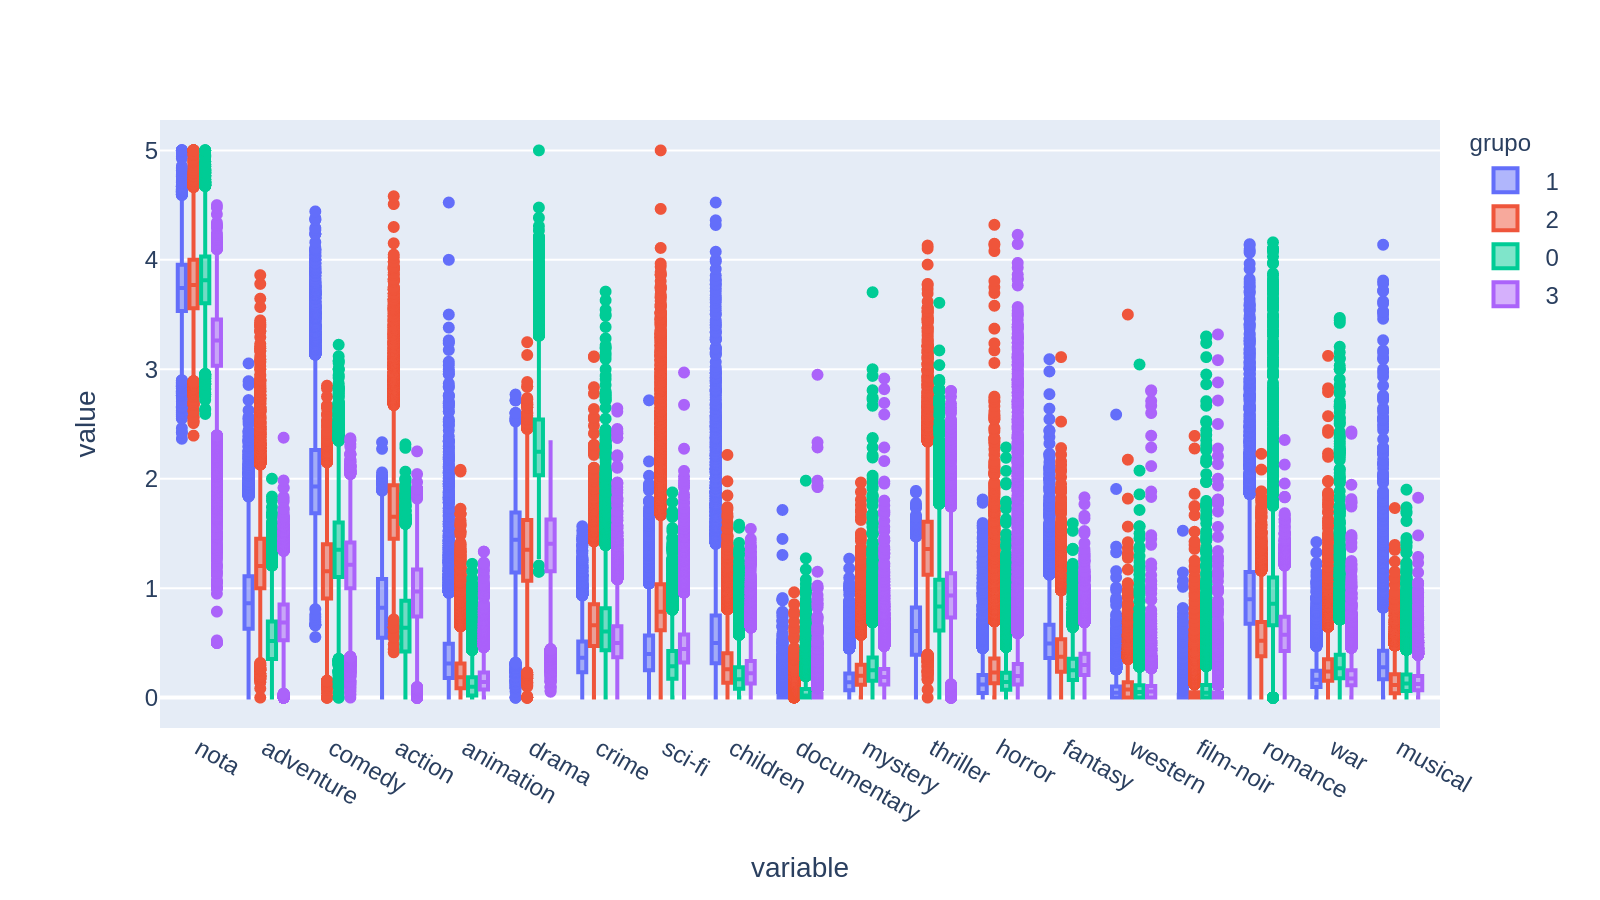

In [37]:
fig = px.box(df_grupos, color='grupo')
gitly.show(fig, scale = 2)

In [38]:
df_rate_grupo = pd.merge(df_rate, df_cluster, how='left', left_on='id_usuario', right_index=True)
df_rate_grupo.head()

,id_usuario,id_filmes,nota,timestamp,grupo
0,1,122,5.0,838985046,1
1,1,185,5.0,838983525,1
2,1,231,5.0,838983392,1
3,1,292,5.0,838983421,1
4,1,316,5.0,838983392,1


In [39]:
df_rate_grupo.tail()

,id_usuario,id_filmes,nota,timestamp,grupo
9999757,71564,2355,4.0,1111545793,3
9999758,71564,2420,2.0,1111545307,3
9999759,71564,2433,3.0,1111545286,3
9999760,71564,2717,2.0,1111545239,3
9999761,71564,2779,3.0,1111545214,3


In [40]:
dict_agrupamento = {}
for i in range(0,k):
  dict_agrupamento[i] = df_rate_grupo[df_rate_grupo.grupo == i]
  print(dict_agrupamento[i].head())

    id_usuario  id_filmes  nota   timestamp  grupo
42           3        110   4.5  1136075500      0
43           3        151   4.5  1133571026      0
44           3        213   5.0  1136075789      0
45           3        590   3.5  1136075494      0
46           3       1148   4.0  1133571121      0
   id_usuario  id_filmes  nota  timestamp  grupo
0           1        122   5.0  838985046      1
1           1        185   5.0  838983525      1
2           1        231   5.0  838983392      1
3           1        292   5.0  838983421      1
4           1        316   5.0  838983392      1
    id_usuario  id_filmes  nota  timestamp  grupo
22           2        110   5.0  868245777      2
23           2        151   3.0  868246450      2
24           2        260   5.0  868244562      2
25           2        376   3.0  868245920      2
26           2        539   3.0  868246262      2
     id_usuario  id_filmes  nota   timestamp  grupo
242           7         32   4.0  1049820474    

In [41]:
n_minimo = 500

In [42]:
# Lista de filmes assistidos mais de n_minimo vezes
df_temp = dict_agrupamento[0].id_filmes.value_counts()
lista_filmes_minimo = list( df_temp[ df_temp.gt(n_minimo)].index )
print(lista_filmes_minimo)

[296, 593, 318, 527, 608, 356, 2858, 50, 858, 110, 150, 590, 457, 260, 1193, 1617, 480, 2028, 36, 1213, 111, 912, 1198, 32, 17, 2762, 47, 25, 1704, 357, 1, 2396, 1221, 34, 1196, 2571, 1721, 1210, 589, 509, 1225, 2997, 1270, 1265, 300, 1247, 592, 1097, 597, 377, 1183, 1089, 923, 1208, 541, 539, 778, 1961, 2959, 750, 1230, 1136, 780, 1307, 265, 1393, 1197, 508, 1252, 1784, 4226, 919, 380, 924, 904, 337, 21, 1358, 58, 587, 2324, 500, 1219, 908, 1206, 588, 1259, 1094, 454, 39, 515, 1214, 1207, 648, 1923, 223, 1246, 364, 595, 903, 62, 11, 1682, 1079, 1240, 3996, 235, 141, 3578, 2291, 1234, 293, 920, 4034, 2692, 1258, 3897, 4973, 2716, 246, 6, 1641, 1304, 339, 1036, 2599, 1233, 1394, 349, 497, 4993, 1222, 736, 1968, 1580, 2329, 16, 1387, 266, 161, 1204, 913, 1090, 1250, 1673, 1288, 253, 953, 344, 2268, 733, 1084, 1291, 1639, 440, 2918, 1073, 1732, 1266, 1674, 1172, 3481, 5060, 367, 800, 4995, 1228, 529, 1200, 3408, 1080, 2712, 474, 1610, 1276, 342, 2395, 4027, 1584, 3176, 4306, 1357, 708, 26

In [43]:
# filtrando e deixando apenas filmes assistidos mais de n_minimo vezes
dict_agrupamento[0] = dict_agrupamento[0][dict_agrupamento[0].id_filmes.isin(lista_filmes_minimo)]

In [44]:
df_sug = {}
df_sug[0] = dict_agrupamento[0].groupby(by='id_filmes').mean().sort_values(by='nota', ascending=False).head(200)
df_sug[0].head(2)

,id_usuario,nota,timestamp,grupo
id_filmes,,,,
858,35372.299971,4.576984,1.012782e+09,0
527,35503.692534,4.504072,9.796908e+08,0


In [45]:
df_final = {}
df_final[0] = pd.merge(df_sug[0][['nota','grupo']], df_filmes, how='left', left_index=True, right_on='id_filmes')
df_final[0].head(10)

,nota,grupo,id_filmes,nomes,categorias
843,4.576984,0,858,"Godfather, The (1972)",Crime|Drama
523,4.504072,0,527,Schindler's List (1993),Drama|War
895,4.501348,0,912,Casablanca (1942),Drama|Romance
315,4.494573,0,318,"Shawshank Redemption, The (1994)",Drama
1169,4.478460,0,1193,One Flew Over the Cuckoo's Nest (1975),Comedy|Drama
737,4.476967,0,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
1181,4.471755,0,1207,To Kill a Mockingbird (1962),Drama
1195,4.471318,0,1221,"Godfather: Part II, The (1974)",Crime|Drama
1186,4.467983,0,1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller
905,4.460879,0,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance


In [46]:
n_minimo = 500
n_top = 200
df_final = {}
df_sug = {}

for i in range(0,k):
  df_temp = dict_agrupamento[i].id_filmes.value_counts()
  lista_filmes_minimo = list( df_temp[ df_temp.gt(n_minimo)].index )
  
  dict_agrupamento[i] = dict_agrupamento[i][dict_agrupamento[i].id_filmes.isin(lista_filmes_minimo)]
  
  df_sug[i] = dict_agrupamento[i].groupby(by='id_filmes').mean().sort_values(by='nota', ascending=False).head(n_top)
  
  
  df_final[i] = pd.merge(df_sug[i][['nota','grupo']], df_filmes, how='left', left_index=True, right_on='id_filmes')

  print(df_final[i][['nota','nomes']].head(7))

          nota                                              nomes
843   4.576984                              Godfather, The (1972)
523   4.504072                            Schindler's List (1993)
895   4.501348                                  Casablanca (1942)
315   4.494573                   Shawshank Redemption, The (1994)
1169  4.478460             One Flew Over the Cuckoo's Nest (1975)
737   4.476967  Dr. Strangelove or: How I Learned to Stop Worr...
1181  4.471755                       To Kill a Mockingbird (1962)
          nota                                              nomes
315   4.551059                   Shawshank Redemption, The (1994)
732   4.471218             Wallace & Gromit: A Close Shave (1995)
523   4.466521                            Schindler's List (1993)
49    4.459681                         Usual Suspects, The (1995)
1125  4.451563        Wallace & Gromit: The Wrong Trousers (1993)
4879  4.449638  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...
708   4.42

# Como faço uma sugestão?


In [47]:
indice_usuario_x = 215

df_usuario_x = df_rate[ df_rate['id_usuario'] == indice_usuario_x ]
df_usuario_x.head()

,id_usuario,id_filmes,nota,timestamp
27868,215,1,5.0,949015769
27869,215,2,4.0,949008881
27870,215,6,5.0,948259719
27871,215,10,4.0,949008811
27872,215,11,4.0,949016452


In [48]:
df_pre_sugestao = pd.merge(df_usuario_x, df_filmes_cat, how='left', on='id_filmes')
df_pre_sugestao.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,215,1,5.0,949015769,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,215,2,4.0,949008881,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,215,6,5.0,948259719,Heat (1995),Action|Crime|Thriller,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,215,10,4.0,949008811,GoldenEye (1995),Action|Adventure|Thriller,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,215,11,4.0,949016452,"American President, The (1995)",Comedy|Drama|Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
df_pre_sugestao.iloc[:,6:] = df_pre_sugestao.iloc[:,6:].multiply(df_pre_sugestao.nota, axis = 'index')
df_pre_sugestao.head()

,id_usuario,id_filmes,nota,timestamp,nomes,categorias,adventure,comedy,action,animation,drama,crime,sci-fi,children,documentary,mystery,thriller,horror,fantasy,western,film-noir,romance,war,musical
0,215,1,5.0,949015769,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,215,2,4.0,949008881,Jumanji (1995),Adventure|Children|Fantasy,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,215,6,5.0,948259719,Heat (1995),Action|Crime|Thriller,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,215,10,4.0,949008811,GoldenEye (1995),Action|Adventure|Thriller,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215,11,4.0,949016452,"American President, The (1995)",Comedy|Drama|Romance,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [50]:
df_pre_sugestao.drop(labels=['id_filmes','id_usuario','timestamp'], inplace = True, axis='columns')
df_feature_usuario_x = df_pre_sugestao.mean()
df_feature_usuario_x

nota           4.165862
adventure      0.774155
comedy         1.550725
action         1.260467
animation      0.175926
drama          2.053945
crime          0.932770
sci-fi         0.562399
children       0.194444
documentary    0.070048
mystery        0.360709
thriller       1.187198
horror         0.311997
fantasy        0.370370
western        0.126006
film-noir      0.150161
romance        0.627617
war            0.214976
musical        0.134461
dtype: float64

In [51]:
# Grupo
grupo_usuario_x = km.predict([df_feature_usuario_x.values])[0]
grupo_usuario_x

0

In [52]:
# O que ele já assistiu
lista_assistidos = list(df_usuario_x.id_filmes.values)
print(lista_assistidos)

[1, 2, 6, 10, 11, 15, 16, 17, 21, 22, 25, 26, 29, 32, 34, 36, 39, 41, 44, 47, 49, 50, 52, 59, 65, 70, 76, 81, 93, 94, 95, 110, 111, 112, 122, 125, 141, 149, 150, 151, 153, 156, 159, 160, 161, 162, 163, 164, 165, 172, 173, 176, 183, 194, 198, 203, 204, 208, 210, 223, 224, 229, 234, 235, 236, 247, 252, 256, 259, 260, 266, 268, 288, 292, 293, 296, 300, 303, 305, 316, 317, 318, 319, 322, 327, 329, 334, 335, 339, 341, 344, 345, 348, 349, 350, 353, 356, 357, 364, 367, 368, 369, 373, 376, 377, 379, 380, 410, 412, 415, 420, 431, 434, 442, 444, 448, 454, 456, 457, 464, 466, 471, 474, 475, 477, 479, 480, 482, 485, 491, 492, 494, 496, 497, 500, 501, 503, 504, 506, 507, 508, 512, 514, 517, 521, 529, 532, 535, 538, 541, 546, 551, 552, 553, 555, 562, 583, 586, 587, 588, 589, 592, 593, 595, 597, 599, 608, 610, 628, 648, 661, 663, 664, 671, 673, 695, 707, 708, 714, 719, 720, 733, 736, 737, 741, 745, 750, 757, 761, 762, 766, 778, 780, 784, 786, 788, 798, 799, 800, 806, 838, 846, 849, 851, 852, 858, 861

In [53]:
# O que ele não assistiu
sugestao = df_final[grupo_usuario_x][~(df_final[grupo_usuario_x].id_filmes.isin(lista_assistidos))]
sugestao[['nota','id_filmes','nomes','categorias']].head(10)

,nota,id_filmes,nomes,categorias
523,4.504072,527,Schindler's List (1993),Drama|War
2646,4.425971,2731,"400 Blows, The (Les Quatre cents coups) (1959)",Crime|Drama
3049,4.397817,3134,"Grand Illusion (Grande illusion, La) (1937)",Drama|War
1861,4.390359,1945,On the Waterfront (1954),Crime|Drama
3375,4.370370,3462,Modern Times (1936),Comedy|Romance
913,4.349359,930,Notorious (1946),Film-Noir|Romance|Thriller
1226,4.343727,1254,"Treasure of the Sierra Madre, The (1948)",Action|Adventure|Drama|Western
2276,4.342636,2360,"Celebration, The (Festen) (1998)",Drama
3010,4.334762,3095,"Grapes of Wrath, The (1940)",Drama
1108,4.334501,1131,Jean de Florette (1986),Drama


# Preparando para deploy

Salvando os top 200 filmes de cada grupo em um arquivo CSV

In [54]:
path_deploy = '/content/drive/MyDrive/Colab Notebooks/Pós/Intro à CD/Sistema_recomendacao'

for i in range(0,k):
  nome_completo = path_deploy+'/'+'tabela_top_grupo_'+str(i)+'.csv'
  df_final[i].to_csv(nome_completo)

Salvar o modelo Kmeans

Tutorial: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [55]:
from joblib import dump

arquivo_modelo = path_deploy+'/'+'modelo_kmeans.joblib'
dump(km, arquivo_modelo)

['/content/drive/MyDrive/Colab Notebooks/Pós/Intro à CD/Sistema_recomendacao/modelo_kmeans.joblib']